### <font color='red'> <b> Thanks For Passing By </font>

#### Here's official [Docs](https://pytorch.org/docs/stable/torchvision/transforms.html) on TransFoms (Must Read)

**Regards, @ecdrid.**



<font color='red'> <b> Oh, yes, and forget about practice, that's completely overrated.<br>
Just kidding....</font>

##  How Transformations Work?

From The Transfer Learning Tutorial Section,
```
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),``
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
```

<font color='red'> <b>The transforms operations are always applied to your original images at every batch generation(depends on your batch size). So your dataset is always left unchanged, only the batch images are copied and transformed every iteration.. </b> </font>


```data_transforms['train'] is basically doing this ```

- Randomly resize the provided image and randomly crop it to obtain a (224, 224) patch.
- Apply or not a random horizontal flip to this patch, with a 50/50 chance.(default probability)
- Convert it to a Tensor.
- Normalize the resulting Tensor, given the mean and deviation values you provided.

```data_transforms['val'] is basically doing this ```

- Resize your image to (256, 256)
- Center crop the resized image to obtain a (224, 224) patch
- Convert it to a Tensor
- Normalize the resulting Tensor, given the mean and deviation values you provided

## The Boring Stuff

In [0]:
!pip install torch==0.4.0 torchvision pillow==5.1.0
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!wget -O google_test_data.zip "https://www.dropbox.com/s/3zmf1kq58o909rq/google_test_data.zip?dl=1"
!unzip -qq google_test_data.zip -d ./google_data
!unzip -qq flower_data.zip
!curl --header "Host: doc-14-90-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header "Cookie: AUTH_ks4j88doq5qta8msosil4pksc8c0bsc1_nonce=l2jgfkaimpjli" --header "Connection: keep-alive" "https://doc-14-90-docs.googleusercontent.com/docs/securesc/80dfq012drscbaseol0ki5m6ok36d0j3/19uv8pt50dri6aqq1jbjcna09c0u5dcf/1544616000000/13103834138810712238/11331583963500499438/1Ei1_3eubl2eCmOq2_Cf8el8dnMEHC7cy?e=download&nonce=l2jgfkaimpjli&user=11331583963500499438&hash=b6h5gfi3j0lk5qnm7675aqehe9voao4d" -o "resnet152_added_fivecrop.pth" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  276M    0  276M    0     0   111M      0 --:--:--  0:00:02 --:--:--  111M


In [0]:
import numpy as np, torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import PIL

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

#this is a fix to ignore import errors #copy pasted from StackOverflow..
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

## FUN BEGINS

In [0]:
## Five Crop

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness = .2, hue=.10),
    transforms.FiveCrop(128),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
    ])
}


def show_dataset(dataset, n=10):
  mpl.rcParams['figure.figsize'] = 25, 50
  _, ax = plt.subplots()
  imgs = np.vstack(np.hstack(np.hstack((np.asarray(dataset[i][0][k]).transpose((1,2,0)) for k in range(5))) for _ in range(n)) for i in range(1,102,10))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground['train'])

show_dataset(dataset,5)

In [0]:
## Five Crop

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness = .2, hue=.10),
    transforms.FiveCrop(128),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
    ])
}


def show_dataset(dataset, n=10):
  mpl.rcParams['figure.figsize'] = 25, 50
  _, ax = plt.subplots()
  imgs = np.vstack(np.hstack(np.hstack((np.asarray(dataset[i][0][k]).transpose((1,2,0)) for k in range(5))) for _ in range(n)) for i in range(1,102,10))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images (On Test Dataset) Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground['train'])

show_dataset(dataset,5)

In [0]:
## Five Crop with Flip

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ColorJitter(brightness = .1, hue=.1),
    transforms.RandomHorizontalFlip(.75),
    transforms.FiveCrop(200),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
    ])
}


def show_dataset(dataset, n=10):
  mpl.rcParams['figure.figsize'] = 25, 50
  _, ax = plt.subplots()
  imgs = np.vstack(np.hstack(np.hstack((np.asarray(dataset[i][0][k]).transpose((1,2,0)) for k in range(5))) for _ in range(n)) for i in range(5,102,10))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground['train'])

show_dataset(dataset,5)

In [0]:
## Five Crop with Flip

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((299,299)),
    transforms.ColorJitter(brightness = .1, hue=.1),
    transforms.RandomHorizontalFlip(.75),
    transforms.FiveCrop(200),
    transforms.Lambda(lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops]))
    ])
}


def show_dataset(dataset, n=10):
  mpl.rcParams['figure.figsize'] = 25, 50
  _, ax = plt.subplots()
  imgs = np.vstack(np.hstack(np.hstack((np.asarray(dataset[i][0][k]).transpose((1,2,0)) for k in range(5))) for _ in range(n)) for i in range(5,102,10))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground['train'])

show_dataset(dataset,5)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness = .2, hue=.18),
    ])
}


def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(1, 102, 10)))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground['train'])

show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ColorJitter(brightness = .2, hue=.18),
    ])
}


def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(1, 102, 10)))
  print(imgs.shape)
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')
  
dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground['train'])

show_dataset(dataset)

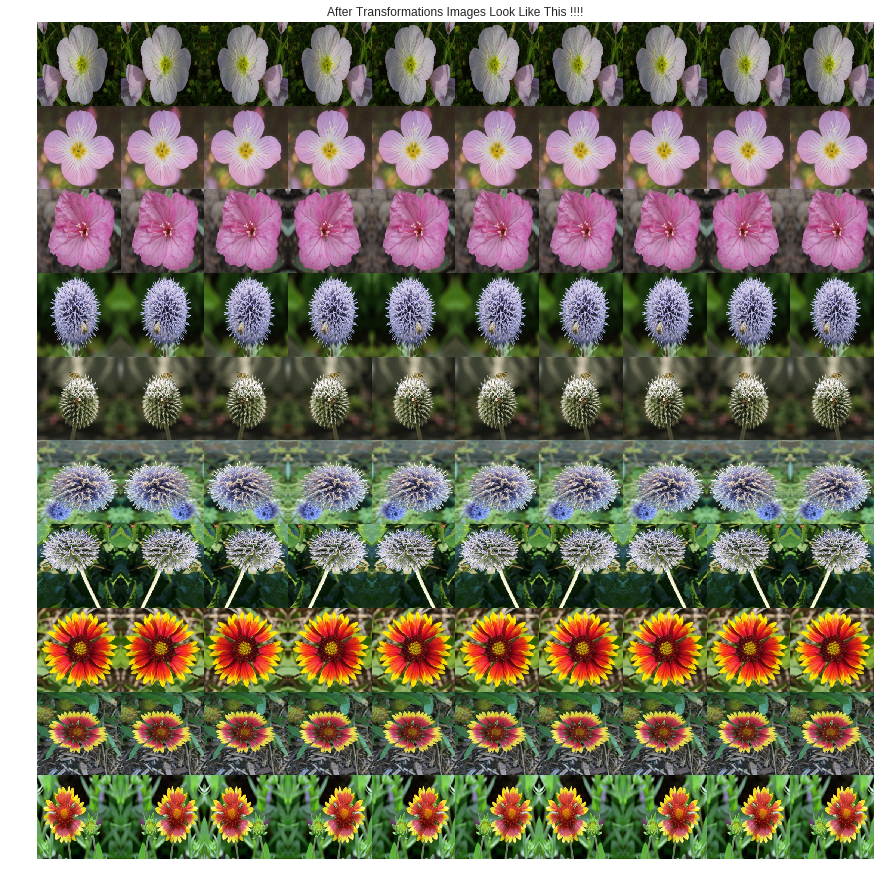

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_2 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(.75)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_2['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(2, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

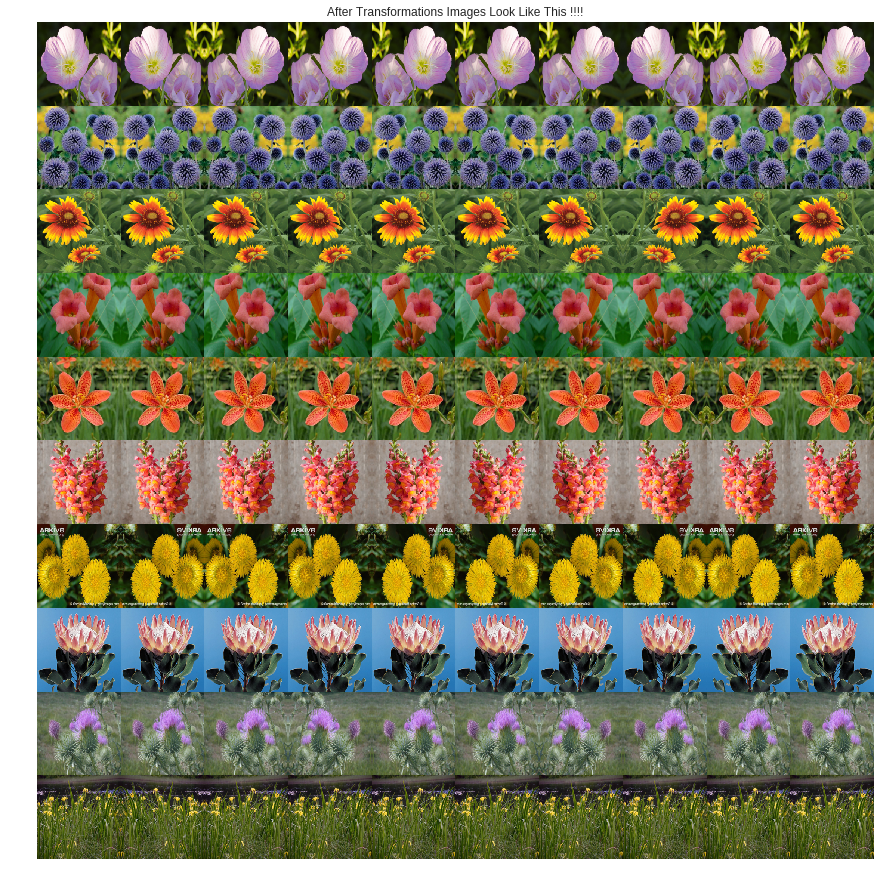

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_2 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(.75)
    ])
}

dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground_2['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(2, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_3 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(.75)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_3['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(3, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

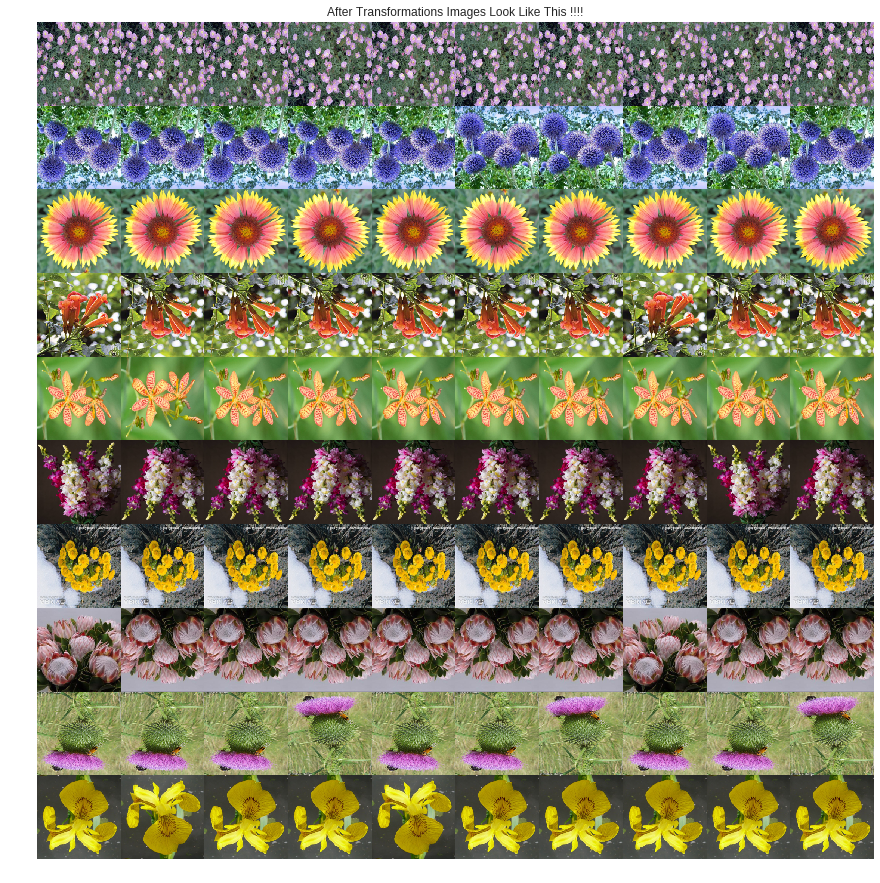

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_3 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomVerticalFlip(.75)
    ])
}

dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground_3['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(3, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_4 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(.5),
    transforms.RandomVerticalFlip(.75)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_4['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(5, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_4 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(.5),
    transforms.RandomVerticalFlip(.75),
    transforms.CenterCrop(200)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_4['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(5, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_5 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(.5),
    transforms.RandomVerticalFlip(.5),
    transforms.CenterCrop(200),
    transforms.ColorJitter(brightness=0.2, hue=.1, saturation=.1)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_5['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(6, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_6 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(128),#matters
    transforms.ColorJitter(brightness=0.2, hue=.1, saturation=.1)
    ])
}

dataset = torchvision.datasets.ImageFolder('google_data/', transform=data_transforms_playground_6['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(7, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)

In [0]:
mpl.rcParams['figure.figsize'] = 15, 25

data_transforms_playground_6 = {
    'train': transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(128),#matters
    transforms.ColorJitter(brightness=0.2, hue=.1, saturation=.1)
    ])
}

dataset = torchvision.datasets.ImageFolder('flower_data/train/', transform=data_transforms_playground_6['train'])

def show_dataset(dataset, n=10):
  _, ax = plt.subplots()
  imgs = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(7, 102, 10)))
  plt.imshow(imgs)
  ax.set_title('After Transformations Images Look Like This !!!!')
  plt.axis('off')

  
show_dataset(dataset)